In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

<h2>Критерий Шапиро-Уилка</h2>
Используется для проверки гипотезы H0: "случайная величина X распределена нормально". <br><br>
Создадим 2 выборки

In [2]:
norm1 = sp.random.normal(1000, 100, size=1000).astype(int) # нормально распределенная выборка
exp1 = sp.random.exponential(1000,size=1000).astype(int) # экспоненциально распределенная выборка

<AxesSubplot:ylabel='Count'>

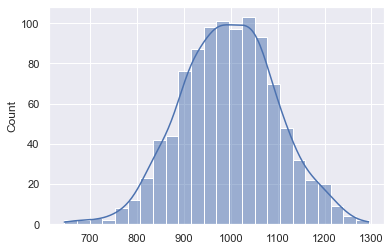

In [3]:
sns.histplot(norm1, kde=True)

<AxesSubplot:ylabel='Count'>

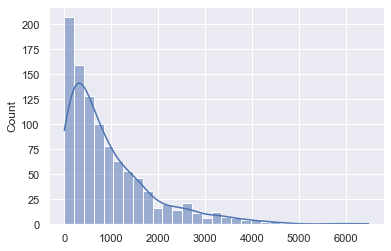

In [4]:
sns.histplot(exp1, kde=True)

Для проверки данного критерия будем использовать модуль stats библиотеки scipy

In [5]:
print(stats.shapiro(norm1))
print(stats.shapiro(exp1))

ShapiroResult(statistic=0.9985722899436951, pvalue=0.6024512052536011)
ShapiroResult(statistic=0.8150427341461182, pvalue=2.3120504512735867e-32)


Здесь нас интересует параметр pvalue. Определяем, является ли выборка нормально распределенной следующим образом:

In [6]:
alpha = 0.05 # уровень значимости
s1, p1 = stats.shapiro(norm1)
if p1 > alpha:
    print('Выборка norm1 выглядит нормально распределенной (не отвергаем H0)')
else:
    print('Выборка norm1 не выглядит нормально распределенной (отвергаем H0)')

Выборка norm1 выглядит нормально распределенной (не отвергаем H0)


In [7]:
s2, p2 = stats.shapiro(exp1)
if p2 > alpha:
    print('Выборка exp1 выглядит нормально распределенной (не отвергаем H0)')
else:
    print('Выборка exp1 не выглядит нормально распределенной (отвергаем H0)')

Выборка exp1 не выглядит нормально распределенной (отвергаем H0)


<h2>Критерий Стьюдента</h2>
Используется для проверки гипотезы об однородности вида <b>смещение</b><br>
 H0: <span style="text-decoration:overline">m</span><sub>y</sub> 
 - 
 <span style="text-decoration:overline">m</span><sub>x</sub> = 0<br>
Для использования должны выполняться требования:
<ul>
    <li>Дисперсии выборок равны</li>
    <li>Выборки нормально распределены</li>
</ul>

In [8]:
x = sp.random.normal(size=100)
y = sp.random.normal(size=100)

N = len(np.concatenate([x,y]))

In [9]:
#Дисперсия объединенной выборки x+y
S_2 = 1/(N-2) * (np.sum((x-x.mean())**2) + np.sum((y-y.mean())**2))
S_2

0.9833508090055106

In [10]:
S = np.sqrt(S_2)
S

0.9916404635781613

In [11]:
#Статистика критерия Стьюдента
T = (y.mean() - x.mean()) / (S*np.sqrt(1/len(x)+1/len(y)))
T

0.45429363446673

In [12]:
#p-value Критерия Стьюдента (для альтернативы H3: "Средние не равны")
stats.t.cdf(-T if T>0 else T, N-2)*2

0.6501151121916069

In [13]:
stats.ttest_ind(y, x, equal_var=True)


Ttest_indResult(statistic=0.4542936344667299, pvalue=0.6501151121916068)

<h2>U-критерий Манна — Уитни</h2>
<h3>(Mann–Whitney U-test, MWW)</h3>
Используется для проверки гипотезы об однородности вида <b>смещение</b><br>
Используется для выборок <b>не имеющих нормальное распределение</b>

In [14]:
x = np.random.normal(1000, 100, 20).astype(int)

y = np.random.normal(1120, 120, 22).astype(int)
x,y

(array([1123,  975, 1094, 1038, 1000, 1001,  975, 1049, 1051, 1081, 1080,
        1109, 1051, 1028, 1095,  973,  928, 1142, 1046,  917]),
 array([1293,  924, 1049, 1173,  950, 1078, 1276, 1119, 1229, 1457, 1077,
        1184,  983, 1069, 1084,  911, 1145, 1052, 1202, 1159,  969, 1160]))

Будем использовать реализацию критерия в scipy

In [15]:
stats.mannwhitneyu(x, y, alternative='two-sided')

MannwhitneyuResult(statistic=134.5, pvalue=0.03227995854323281)

Можно посчитать через нормальное распределение

In [16]:
n1 = len(x)
n2 = len(y)
N = n1 + n2

R = stats.rankdata(np.hstack([x, y]))
R1 = R[:n1]
R2 = R[n1:N]
R1, R2

(array([31. ,  8.5, 27. , 14. , 11. , 12. ,  8.5, 16.5, 18.5, 25. , 24. ,
        29. , 18.5, 13. , 28. ,  7. ,  4. , 32. , 15. ,  2. ]),
 array([41. ,  3. , 16.5, 36. ,  5. , 23. , 40. , 30. , 39. , 42. , 22. ,
        37. , 10. , 21. , 26. ,  1. , 33. , 20. , 38. , 34. ,  6. , 35. ]))

In [17]:
U1 = n1 * n2 + n1 * (n1 + 1) / 2 - R1.sum()
U2 = n1 * n2 + n2 * (n2 + 1) / 2 - R2.sum()
U1 + U2, n1 * n2

(440.0, 440)

In [18]:
#статистика критерия
U = min(U1, U2)
U1, U2, U

(305.5, 134.5, 134.5)

In [19]:
MU = n1 * n2 / 2
DU = n1 * n2 * (n1 + n2 + 1) / 12
std_U = (U - MU) / np.sqrt(DU)
std_U

-2.15325850717732

In [20]:
#p-value критерия
stats.norm.cdf(std_U) * 2

0.031298367807306056

<h2>Критерий Фишера</h2>
Используется для проверки гипотезы об однородности вида <b>растяжение/сжатие</b><br>
H0: y.var/x.var=1<br>
Используется для выборок <b>имеющих нормальное распределение</b>

In [21]:
x = np.random.normal(0, 100, size=100)
y = np.random.normal(0, 100, size=100)

n=y.size
m=x.size

print(y.mean(), x.mean())
print(y.var(ddof=1), x.var(ddof=1))

0.7656706952171625 11.229762773275485
10322.15147765575 10953.20254956759


<h4>Для альтернативной гипотезы H3: "дисперсии не равны"</h4>

In [22]:
xvar = x.var(ddof=1)
yvar = y.var(ddof=1)
if yvar > xvar:
    #Статистика Критерия Фишера
    T = yvar / xvar
    #p-value Критерия Фишера
    p_value = 1 - stats.f.cdf(T, n - 1, m - 1)
else:
    T = xvar / yvar
    p_value = 1 - stats.f.cdf(T, m - 1, n - 1)
# двусторонний критерий, поэтому 2*p_value
T, 2*p_value

(1.0611356143414354, 0.7684178441100826)

#### Для альтернативной гипотезы H1: yvar/xvar<1

In [23]:
yvar = y.var(ddof=1)
xvar = x.var(ddof=1)

n = y.size
m = x.size
if yvar < xvar:
    #Статистика Критерия Фишера
    T = xvar / yvar
    #p-value Критерия Фишера
    p_value = 1 - stats.f.cdf(T, m - 1, n - 1)
    print(T, p_value)
else:
    print('Принимаем H0')

1.0611356143414354 0.3842089220550413


#### Для альтернативной гипотезы H2: yvar/xvar>1

In [24]:
yvar = y.var(ddof=1)
xvar = x.var(ddof=1)

n = y.size
m = x.size
if yvar > xvar:
    #Статистика Критерия Фишера
    T = yvar / xvar
    #p-value Критерия Фишера
    p_value = 1 - stats.f.cdf(T, n - 1, m - 1)
    print(T, p_value)
else:
    print('Принимаем H0')

Принимаем H0


<h2>Критерий Ансари-Бредли</h2>
Используется для проверки гипотезы об однородности вида <b>растяжение/сжатие</b><br>
Используется для выборок <b>не имеющих нормальное распределение</b>

In [25]:
x = np.random.exponential(size=100)
y = np.random.exponential(size=100)

In [26]:
#Статистика Критерия Ансари-Бредли
N = x.size + y.size
print(N)
A = 0
for r in stats.rankdata(np.hstack([x, y]))[:x.size]:
    A += (N + 1) / 2 - np.abs(r - (N + 1) / 2)
A

200


5391.0

In [27]:
if N%2==0:
    M = x.size * (N + 2) / 4
    D = x.size * y.size * (N + 2) * (N - 2) / (48 * (N - 1))
else:
    M = x.size * (N + 1)**2 / (4 * N)
    D = x.size * y.size * (N**2 + 3) * (N + 1) / (48 * N**2)

#Стандартизованная статистика
A_std = (A - M) / np.sqrt(D)
A_std

1.6664537157685118

In [28]:
p_value = 2*(stats.norm.cdf(A_std if A_std<0 else -A_std))
p_value

0.09562307955679851

In [29]:
stats.ansari(x,y)

AnsariResult(statistic=5391.0, pvalue=0.09562307955679851)